# Lab Part 1 - Eiweck Manuel 01633012

## Task 1: Clustering

In this task you will have to cluster the food types according to two nutrition elements. The following combinations are suggestions, you can also find your own preferred combination of nutrition elements:

* Energy_(kcal) and Protein_(g)
* Energy_(kcal) and Carbohydrt_(g)
* Energy_(kcal) and Water_(g)
* Energy_(kcal) and FA_Sat_(g)
* Water_(g) and Zinc_(mg)
* Water_(g) and Iron_(mg)
* Water_(g) and Phosphorus_(mg)
* Water_(g) and Sugar_(g)
* Sugar_(g) and Protein_(mg)

Statistical analysis: Use the Python functionalities, for example sklearn.cluster, to cluster the data.
Visualization: Use a 2D scatter plot, or any other visualization you would prefer, to identify the clusters. Use the Python plotting functionalities, for example pyplot.

### Please answer the following questions in the final report:

 1) Why did you select the specific combination of nutrition elements?
 
 2) How did you find out how many clusters need to be formed to describe the data best?
 
 3) Which Python functionality did you use for the statistical analysis and which visualization type did you employ?
 
 4) Which aspects of the task (e.g., identifying the number of clusters) where easier to solve by using statistical analysis, and which by using visualization?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

# The following instructs graphical plots to appear directly in the notebook.
%matplotlib inline

In [2]:
dataset = pd.read_csv(filepath_or_buffer = 'USDA_Food_Database.csv',sep=';', decimal = ",")
headerWithValues = ['Water_(g)','Energy_(kcal)','Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)','Iron_(mg)','Magnesium_(mg)','Phosphorus_(mg)','Potassium_(mg)','Sodium_(mg)','Zinc_(mg)','Copper_(mg)','Manganese_(mg)','Selenium_(µg)','Vit_C_(mg)','Thiamin_(mg)','Riboflavin_(mg)','Niacin_(mg)','Panto_Acid_mg)','Vit_B6_(mg)','Folate_Tot_(µg)','Folic_Acid_(µg)','Food_Folate_(µg)','Folate_DFE_(µg)','Choline_Tot_ (mg)','Vit_B12_(µg)','Vit_A_(µg)','Retinol_(µg)','Alpha_Carot_(µg)','Beta_Carot_(µg)','Beta_Crypt_(µg)','Lycopene_(µg)','Lut+Zea_ (µg)','Vit_E_(mg)','Vit_D_(µg)','Vit_K_(µg)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)','Cholestrl_(mg)']
datasetValues = dataset[headerWithValues]

In [3]:
dataset.describe()

,No,Water_(g),Energy_(kcal),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_(µg),Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
count,8790.000000,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,8442.000000,...,5520.000000,5498.000000,5475.000000,5901.000000,5528.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000
mean,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,76.738214,...,10.623913,157.039651,193.970046,1.331518,0.579269,15.631586,3.576334,4.081006,2.288767,40.613246
std,9251.413586,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,203.527453,...,155.313138,1397.230145,1148.404329,4.640706,3.882702,79.949125,6.518840,7.010760,5.215654,119.869371
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9086.250000,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.120000,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000
50%,14427.500000,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,21.000000,...,0.000000,0.000000,0.000000,0.300000,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000
75%,20142.750000,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,69.000000,...,0.000000,0.000000,30.000000,0.800000,0.200000,5.200000,4.345000,5.115000,2.081000,67.000000
max,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,7364.000000,...,6252.000000,46260.000000,19697.000000,149.400000,250.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000


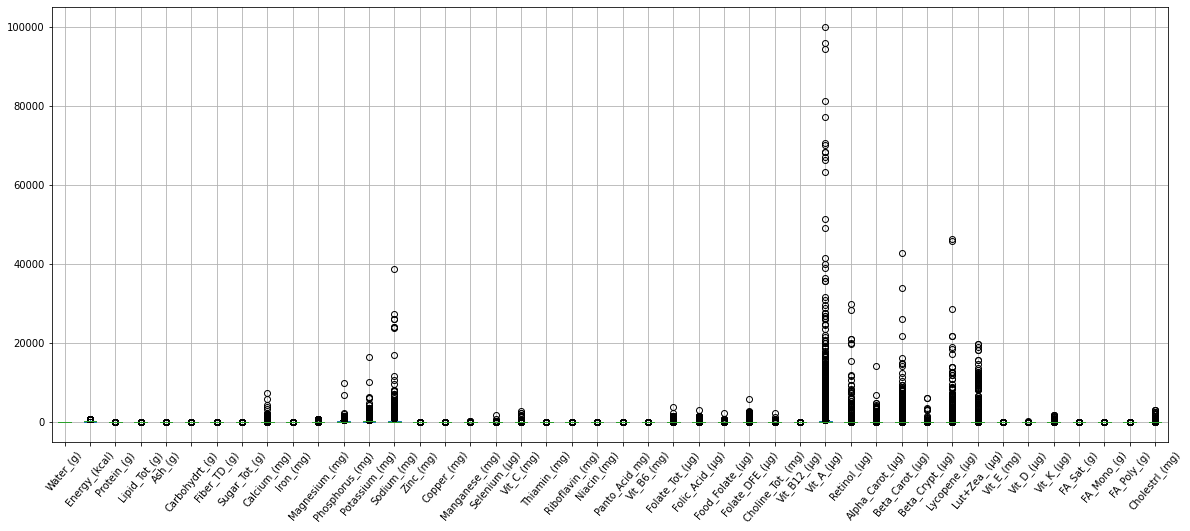

In [4]:
plt.figure (figsize=(20,8))
dataset.iloc [:,1:].boxplot(rot=50);

In [5]:
# normalize the data
#min_max_scaler = preprocessing.MinMaxScaler()
#dataset[headerWithValues] = min_max_scaler.fit_transform(dataset[headerWithValues])

In [6]:
#dataset.describe()

In [7]:
#lt.figure (figsize=(20,8))
#dataset.iloc [:,1:].boxplot(rot=50);

In [8]:
# parallel plot
from pandas.plotting import parallel_coordinates
header = ['Keyword','Water_(g)','Energy_(kcal)','Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)','Iron_(mg)','Magnesium_(mg)','Phosphorus_(mg)','Potassium_(mg)','Sodium_(mg)','Zinc_(mg)','Copper_(mg)','Manganese_(mg)','Selenium_(µg)','Vit_C_(mg)','Thiamin_(mg)','Riboflavin_(mg)','Niacin_(mg)','Panto_Acid_mg)','Vit_B6_(mg)','Folate_Tot_(µg)','Folic_Acid_(µg)','Food_Folate_(µg)','Folate_DFE_(µg)','Choline_Tot_ (mg)','Vit_B12_(µg)','Vit_A_(µg)','Retinol_(µg)','Alpha_Carot_(µg)','Beta_Carot_(µg)','Beta_Crypt_(µg)','Lycopene_(µg)','Lut+Zea_ (µg)','Vit_E_(mg)','Vit_D_(µg)','Vit_K_(µg)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)','Cholestrl_(mg)']
#plt.figure (figsize=(50,40))
#parallel_coordinates(dataset[header],'Keyword')

In [9]:
#dataset.plot.scatter(x='Energy_(kcal)',y='Protein_(g)',c='DarkBlue')

### Scale

In [10]:
from sklearn.preprocessing import scale
scale_dataset = scale(datasetValues)
scale_dataset = pd.DataFrame(scale_dataset,columns=headerWithValues)

In [23]:
#scale_dataset.describe()

### Clustering

In [12]:
from sklearn.cluster import KMeans
def clusterData(dataset,clusterColumn,dataPair,scale_dataset):
    uniqueKeywords = dataset[clusterColumn].unique()
    clustering = KMeans(n_clusters=uniqueKeywords.size,random_state = 5)
    clustering.fit(scale_dataset[dataPair])
    return clustering.labels_

In [13]:
import matplotlib.cm as cm
def plotResult(clusterColumn,clusteredLabels,dataPair,dataset):
    colors = cm.rainbow(np.linspace(0, 1, dataset[clusterColumn].unique().size))
    keywordSet = dataset.copy(deep=True)
    labels = keywordSet[clusterColumn].unique().tolist()
    mapping = dict( zip(labels,range(len(labels))) )
    keywordSet.replace({clusterColumn: mapping},inplace=True)
    #keywordSet['Keyword'] now contains the labels in indexed array

    
    plt.subplot(1,2,1)
    plt.scatter(marker='.',x=dataset[dataPair[0]],y=dataset[dataPair[1]],c=colors[keywordSet[clusterColumn]])
    plt.title('Ground Truth')

    plt.subplot(1,2,2)
    plt.scatter(marker='.',x=dataset[dataPair[0]],y=dataset[dataPair[1]],c=colors[clusteredLabels])
    plt.title('Cluster {'+dataPair[0]+','+dataPair[1] +'} Result ')


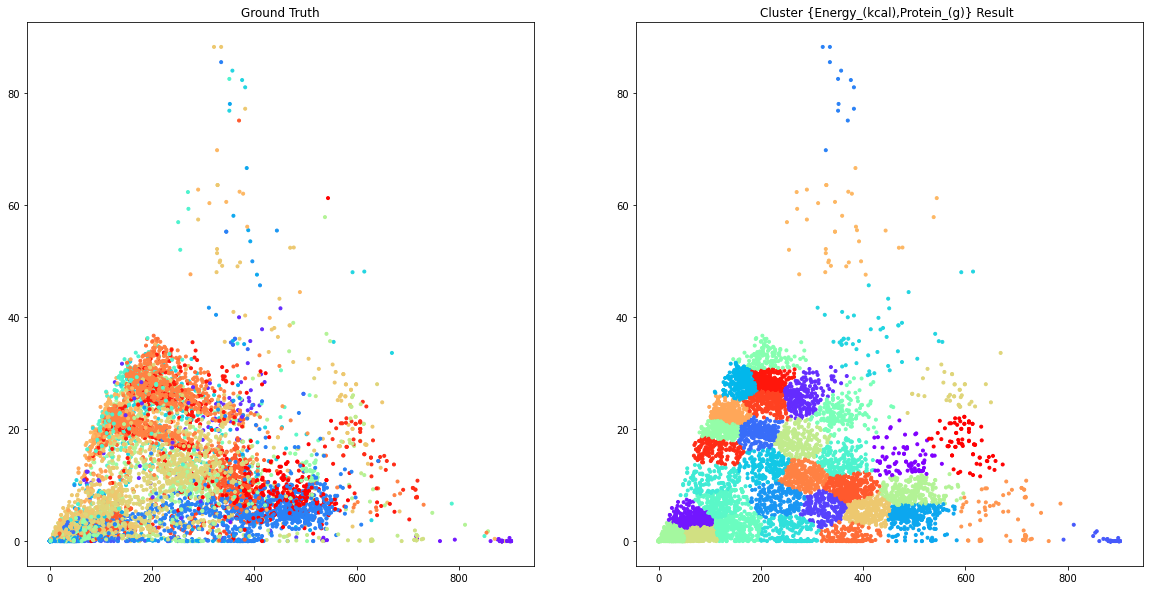

In [21]:
plt.figure(figsize=(20, 10))
dataPair=['Energy_(kcal)','Protein_(g)']
clusterColumn='Keyword'
clusteredLabels = clusterData(dataPair=dataPair,dataset=dataset,scale_dataset=scale_dataset,clusterColumn=clusterColumn)
plotResult(dataset=dataset,clusterColumn=clusterColumn,clusteredLabels=clusteredLabels,dataPair=dataPair)

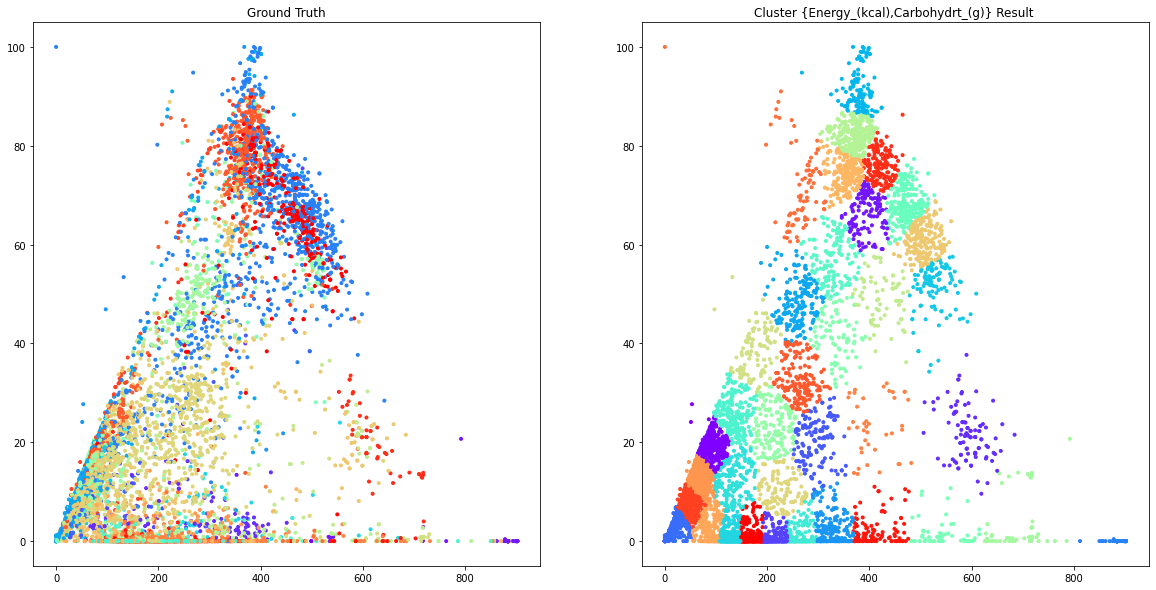

In [22]:
plt.figure(figsize=(20, 10))
dataPair=['Energy_(kcal)','Carbohydrt_(g)']
clusterColumn='Keyword'
clusteredLabels = clusterData(dataPair=dataPair,dataset=dataset,scale_dataset=scale_dataset,clusterColumn=clusterColumn)
plotResult(dataset=dataset,clusterColumn=clusterColumn,clusteredLabels=clusteredLabels,dataPair=dataPair)

In [16]:
#ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
#plt.figure(figsize=(20, 10))
#dataPair=['Energy_(kcal)','Water_(g)']
#clusterColumn='Keyword'
#clusteredLabels = clusterData(dataPair=dataPair,dataset=dataset,scale_dataset=scale_dataset,clusterColumn=clusterColumn)
#plotResult(dataset=dataset,clusterColumn=clusterColumn,clusteredLabels=clusteredLabels,dataPair=dataPair)

In [17]:
#ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
#plt.figure(figsize=(20, 10))
#dataPair=['Energy_(kcal)','FA_Sat_(g)']
#clusterColumn='Keyword'
#clusteredLabels = clusterData(dataPair=dataPair,dataset=dataset,scale_dataset=scale_dataset,clusterColumn=clusterColumn)
#plotResult(dataset=dataset,clusterColumn=clusterColumn,clusteredLabels=clusteredLabels,dataPair=dataPair)

In [18]:
plt.figure(figsize=(20, 10))
dataPair=['Sugar_(g)','Protein_(mg)']
clusterColumn='Keyword'
clusteredLabels = clusterData(dataPair=dataPair,dataset=dataset,scale_dataset=scale_dataset,clusterColumn=clusterColumn)
plotResult(dataset=dataset,clusterColumn=clusterColumn,clusteredLabels=clusteredLabels,dataPair=dataPair)

KeyError: "None of [Index(['Sugar_(g)', 'Protein_(mg)'], dtype='object')] are in the [columns]"

<Figure size 1440x720 with 0 Axes>